# Big Data (UBA) -  2024

## Trabajo Práctico 4 

### Grupo 2
- Jimena Teran 
- Juan Lynch
- Renzo Falciglia

### Parte I: Analizando la base

#### Ejercicio 2
En este ejercicio se cargan los archivos y se unen a la base del TP3.

In [14]:
#Ejercicio 2

#Importamos los paquetes necesarios y cargamos el archivo del 1T de 2004

import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import numpy as np
import pyarrow 


#Cargamos la base de hogares de 2004
archivo_dta = "EPH_1T2004/Hogar_t104.dta"
df_2004 = pd.read_stata(archivo_dta)
print(df_2004.head())

#Cargamos la base de hogares de 2024
archivo_txt = "EPH_1T2024/usu_hogar_t124.txt"
df_2024 = pd.read_csv(archivo_txt,  sep=";")
print(df_2024.head())


     CODUSU  nro_hogar realizada    ano4       trimestre    region mas_500  \
0  125051          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
1  125082          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
2  125181          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
3  125283          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   
4  126192          1.0        Sí  2004.0  1er. Trimestre  Pampeana       S   

      aglomerado  pondera   iv1  ... gdeccfr pdeccfr adeccfr vii1_1 vii1_2  \
0  Gran La Plata    355.0  Casa  ...      01              01    1.0    0.0   
1  Gran La Plata    306.0  Casa  ...      03              02    2.0    0.0   
2  Gran La Plata    541.0  Casa  ...      09              09    2.0    0.0   
3  Gran La Plata    255.0  Casa  ...      07              07    1.0    2.0   
4  Gran La Plata    218.0  Casa  ...      08              08    2.0    0.0   

                                 vii2_1 vii2_2 vii2_3 vii2_4 i

In [15]:
#Cambio los nombres
df_2004.columns = df_2004.columns.str.upper()
print(df_2004.columns)
print(df_2024.columns)

Index(['CODUSU', 'NRO_HOGAR', 'REALIZADA', 'ANO4', 'TRIMESTRE', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3',
       'VII2_4', 'IDIMPH'],
      dtype='object')
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA',

In [16]:
#Filtro los aglomerados que no corresponden a CABA o a partidos del Gran Buenos Aires

df_2004 = df_2004[df_2004["AGLOMERADO"].isin(["Ciudad de Buenos Aires", "Partidos del GBA"])]
df_2024 = df_2024[df_2024["AGLOMERADO"].isin([32, 33])]

In [17]:
#Filtro por las variables de interés para predecir el desempleo

variables_filtrar = ["CODUSU", "NRO_HOGAR", "AGLOMERADO", "ITF", "IPCF", "DECIFR", "DECCFR", "IV1", "II1", "II2", "V5", "IX_TOT", "IV12_3",
                     "II4_3", "II9", "V1"]

#Filtramos en la base de 2004
df_2004 = df_2004[variables_filtrar]

#Filtramos en la base de 2024
df_2024 = df_2024[variables_filtrar]

In [18]:
#Unimos verticalmente y verificamos los resultados
df_hogar = pd.concat([df_2004, df_2024], ignore_index=True)

print(df_hogar.head())

     CODUSU  NRO_HOGAR              AGLOMERADO     ITF   IPCF DECIFR DECCFR  \
0  125098          1.0  Ciudad de Buenos Aires   368.0  368.0     02     07   
1  125397          1.0  Ciudad de Buenos Aires     0.0    0.0     00     00   
2  125515          1.0  Ciudad de Buenos Aires   440.0  440.0     03     07   
3  125558          1.0  Ciudad de Buenos Aires  2130.0  532.5     09     08   
4  125599          1.0  Ciudad de Buenos Aires  1040.0  208.0     07     04   

            IV1  II1  II2  V5  IX_TOT IV12_3 II4_3  \
0  Departamento  3.0  1.0  No     1.0     No    No   
1  Departamento  2.0  1.0  No     1.0     No    No   
2  Departamento  2.0  1.0  No     1.0     No    No   
3  Departamento  4.0  3.0  No     4.0     No    No   
4          Casa  4.0  3.0  No     5.0     No    Sí   

                                                 II9  V1  
0  Compartido con otro/s hogar/es de la misma viv...  No  
1                            Uso exclusivo del hogar  Sí  
2                      

In [19]:
#Cargamos la bbdd del TP3, que la generé con el script "TP4_UBA_bbdd_TP3.ipynb"

df_individual = pd.read_parquet('datos.individual')
print(df_individual)

       AGLOMERADO                         CODUSU  NRO_HOGAR  CH04  CH06  CH07  \
0            32.0                         125098        1.0   1.0  79.0   4.0   
1            32.0                         125397        1.0   2.0  67.0   3.0   
2            32.0                         125515        1.0   2.0  74.0   4.0   
3            32.0                         125558        1.0   1.0  54.0   2.0   
4            32.0                         125558        1.0   2.0  51.0   2.0   
...           ...                            ...        ...   ...   ...   ...   
13565        33.0  TQRMNOPUQHKMKNCDEIJAH00861661        1.0   2.0  43.0   3.0   
13566        33.0  TQRMNOPUQHKMKNCDEIJAH00861661        1.0   1.0  21.0   5.0   
13567        33.0  TQRMNOPUQHKMKNCDEIJAH00861661        1.0   1.0  20.0   5.0   
13568        33.0  TQRMNOPUQHKMKNCDEIJAH00861661        1.0   1.0  11.0   5.0   
13569        33.0  TQRMNOPUQHKMKNCDEIJAH00861661        1.0   2.0  24.0   5.0   

       CH08  NIVEL_ED  ESTA

In [20]:
#Transformo las variables para poder hacer el merge

# Asegurarse de que las columnas no tengan valores NaN o no numéricos
df_individual['NRO_HOGAR'] = pd.to_numeric(df_individual['NRO_HOGAR'], errors='coerce')
df_hogar['NRO_HOGAR'] = pd.to_numeric(df_hogar['NRO_HOGAR'], errors='coerce')

# Manejar valores NaN antes de convertir a int64
df_individual['NRO_HOGAR'].fillna(0, inplace=True)  # Reemplazar NaN con 0, o usa otro valor según convenga
df_hogar['NRO_HOGAR'].fillna(0, inplace=True)

# Convertir a int64
df_individual['NRO_HOGAR'] = df_individual['NRO_HOGAR'].astype('int64')
df_hogar['NRO_HOGAR'] = df_hogar['NRO_HOGAR'].astype('int64')

# Confirmar el tipo de datos
print(df_individual['NRO_HOGAR'].dtype)  
print(df_hogar['NRO_HOGAR'].dtype)        


int64
int64


/var/folders/yq/hslcp2kx13xch3kwq7cvmrf00000gn/T/ipykernel_70486/1976463751.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_individual['NRO_HOGAR'].fillna(0, inplace=True)  # Reemplazar NaN con 0, o usa otro valor según convenga
/var/folders/yq/hslcp2kx13xch3kwq7cvmrf00000gn/T/ipykernel_70486/1976463751.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because 

In [21]:
#Veo los formatos para poder hacer el merge

print(df_individual['CODUSU'].dtype)
print(df_hogar['CODUSU'].dtype)

print(df_individual['NRO_HOGAR'].dtype)
print(df_hogar['NRO_HOGAR'].dtype)

object
object
int64
int64


In [22]:
# Quitar espacios en blanco de CODUSU (si hay)
df_individual['CODUSU'] = df_individual['CODUSU'].str.strip()
df_hogar['CODUSU'] = df_hogar['CODUSU'].str.strip()

# Asegurar consistencia en tipos (reconvertir por seguridad)
df_individual['CODUSU'] = df_individual['CODUSU'].astype(str)
df_hogar['CODUSU'] = df_hogar['CODUSU'].astype(str)

df_individual['NRO_HOGAR'] = df_individual['NRO_HOGAR'].astype(int)
df_hogar['NRO_HOGAR'] = df_hogar['NRO_HOGAR'].astype(int)

In [23]:
# Merge entre df_individual y df_hogar
df_final = pd.merge(df_individual, df_hogar, on=['CODUSU', 'NRO_HOGAR'], how='left')

# Mostrar las primeras filas del DataFrame resultante
print(df_final.head())

   AGLOMERADO_x  CODUSU  NRO_HOGAR  CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  \
0          32.0  125098          1   1.0  79.0   4.0   1.0       3.0     3.0   
1          32.0  125397          1   2.0  67.0   3.0   4.0       2.0     1.0   
2          32.0  125515          1   2.0  74.0   4.0   1.0       2.0     3.0   
3          32.0  125558          1   1.0  54.0   2.0   2.0       2.0     1.0   
4          32.0  125558          1   2.0  51.0   2.0   2.0       6.0     3.0   

   CAT_INAC  ...  DECCFR           IV1  II1  II2  V5 IX_TOT IV12_3 II4_3  \
0       1.0  ...      07  Departamento  3.0  1.0  No    1.0     No    No   
1       0.0  ...      00  Departamento  2.0  1.0  No    1.0     No    No   
2       1.0  ...      07  Departamento  2.0  1.0  No    1.0     No    No   
3       0.0  ...      08  Departamento  4.0  3.0  No    4.0     No    No   
4       4.0  ...      08  Departamento  4.0  3.0  No    4.0     No    No   

                                                 II9  V1  
0  

In [24]:
#Transformaciones a la base final

df_final.drop(columns=['AGLOMERADO_y'], inplace=True)  # Eliminar 'aglomerado.y'
df_final.rename(columns={'AGLOMERADO_x': 'AGLOMERADO'}, inplace=True)  # Renombrar 'aglomerado.x' a 'aglomerado'

In [25]:
IV1_mapping = {
   'Departamento': 2,
   'Casa': 1,
   'Pieza de inquilinato': 3,
   'Pieza en hotel/pensión': 4,
   'Otro': 5
}

df_final['IV1'] = df_final['IV1'].map(lambda x: IV1_mapping.get(x, x))

print(df_final['IV1'].value_counts(dropna=False))

IV1
1    9376
2    4079
4      44
3      35
5      27
6       9
Name: count, dtype: int64


In [26]:
# Transformo los valores de la columna V5 manteniendo otros valores
V5_mapping = {
    'Sí': 1,
    'No': 2,
    'Ns./Nr.': 9
}

# Aplicamos el mapping solo donde hay coincidencia y mantenemos otros valores
df_final['V5'] = df_final['V5'].map(lambda x: V5_mapping.get(x, x))

In [27]:
print(df_final['II4_3'].value_counts(dropna=False))

II4_3
No     5925
2      4530
Sí     1579
1      1523
0.0      13
Name: count, dtype: int64


In [28]:
# Transformo los valores de la columna IV12_3 manteniendo otros valores
IV12_3_mapping = {
   'Sí': 1,
   'No': 2,
   'Ns./Nr.': 0
}

df_final['IV12_3'] = df_final['IV12_3'].map(lambda x: IV12_3_mapping.get(x, x))


In [29]:
# Transformo los valores de la columna II4_3 manteniendo otros valores
II4_3_mapping = {
   'Sí': 1,
   'No': 2,
   'Ns./Nr.': 0
}

df_final['II4_3'] = df_final['II4_3'].map(lambda x: II4_3_mapping.get(x, x))


In [30]:
# Transformo los valores de la columna V1 manteniendo otros valores
V1_mapping = {
   'Sí': 1,
   'No': 2
}

df_final['V1'] = df_final['V1'].map(lambda x: V1_mapping.get(x, x))

# Verificamos el resultado
print(df_final['V1'].value_counts(dropna=False))

V1
1    11920
2     1629
9       21
Name: count, dtype: int64


In [31]:
#Transformo variables DECIFR y DECCFR

# Reemplaza las cadenas vacías por NaN
df_final['DECIFR'] = df_final['DECIFR'].replace('', np.nan)

# Luego convierte la columna a float
df_final['DECIFR'] = df_final['DECIFR'].astype(float)

# Haz lo mismo para la columna 'DECCFR'
df_final['DECCFR'] = df_final['DECCFR'].replace('', np.nan)
df_final['DECCFR'] = df_final['DECCFR'].astype(float)

df_final['DECIFR'] = pd.to_numeric(df_final['DECIFR'], errors='coerce')
df_final['DECCFR'] = pd.to_numeric(df_final['DECCFR'], errors='coerce')

df_final['DECIFR'] = df_final['DECIFR'].astype(str).str.lstrip('0')
df_final['DECCFR'] = df_final['DECCFR'].astype(str).str.lstrip('0')

df_final['DECIFR'] = df_final['DECIFR'].astype(float)
df_final['DECCFR'] = df_final['DECCFR'].astype(float)


print(df_final.head())

   AGLOMERADO  CODUSU  NRO_HOGAR  CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  \
0        32.0  125098          1   1.0  79.0   4.0   1.0       3.0     3.0   
1        32.0  125397          1   2.0  67.0   3.0   4.0       2.0     1.0   
2        32.0  125515          1   2.0  74.0   4.0   1.0       2.0     3.0   
3        32.0  125558          1   1.0  54.0   2.0   2.0       2.0     1.0   
4        32.0  125558          1   2.0  51.0   2.0   2.0       6.0     3.0   

   CAT_INAC  ...  DECCFR  IV1  II1  II2 V5  IX_TOT  IV12_3  II4_3  \
0       1.0  ...     7.0    2  3.0  1.0  2     1.0     2.0    2.0   
1       0.0  ...     0.0    2  2.0  1.0  2     1.0     2.0    2.0   
2       1.0  ...     7.0    2  2.0  1.0  2     1.0     2.0    2.0   
3       0.0  ...     8.0    2  4.0  3.0  2     4.0     2.0    2.0   
4       4.0  ...     8.0    2  4.0  3.0  2     4.0     2.0    2.0   

                                                 II9 V1  
0  Compartido con otro/s hogar/es de la misma viv...  2  


In [32]:
#EJERCICIO 4 CREO 3 VARIABLES QUE AYUDEN A PREDECIR EL DESEMPLEO

# 1- Creo una variable que asigna un 1 si la persona es mayor de 50 años y vive en una casa sin garage
df_final['mayor_garage'] = np.where((df_final['CH06'] > 50) & (df_final['II4_3'] == 1), 1, 0)

# 2- Creo una variable que asigna un 1 si la persona es mujer y vive en una villa de emergencia
df_final['mujer_emergencia'] = np.where((df_final['CH04'] == 2) & (df_final['IV12_3'] == 1), 1, 0)

# 3- Creo una variable que asigna un 1 si la persona es mujer y vive en una casa con más de 3 habitantes
df_final['mujer_hogar'] = np.where((df_final['CH04'] == 2) & (df_final['IX_TOT'] > 3), 1, 0)

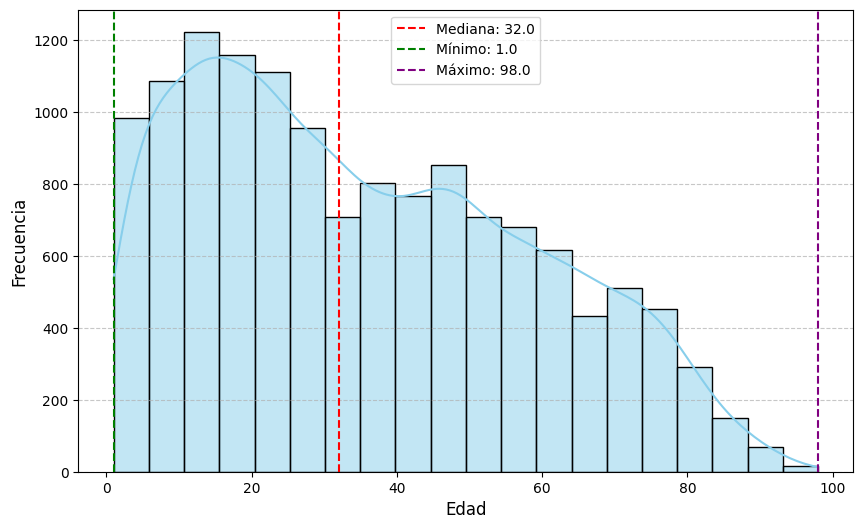

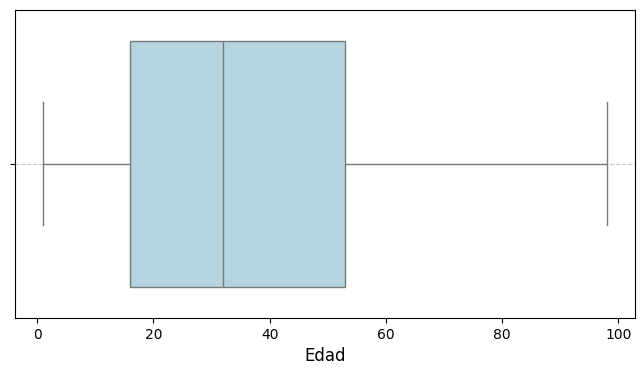

Estadísticas Descriptivas de la Variable CH06 (Edad):
count    13570.000000
mean        35.598674
std         23.051581
min          1.000000
25%         16.000000
50%         32.000000
75%         53.000000
max         98.000000
Name: CH06, dtype: float64
Desviación estándar: 23.051580608926013
Mediana: 32.0
Rango: 1.0 - 98.0


In [33]:
#EJERCICIO 5 ESTADÍSTICAS DESCRIPTIVAS VARIABLES SELECCIONADAS

#VARIABLE EDAD CH06

import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas
desc_stats = df_final['CH06'].describe()
std_dev = df_final['CH06'].std()
median = df_final['CH06'].median()
min_age = df_final['CH06'].min()
max_age = df_final['CH06'].max()

# Visualización de la distribución
plt.figure(figsize=(10, 6))

# Histograma con KDE (Kernel Density Estimation)
sns.histplot(df_final['CH06'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.axvline(median, color='red', linestyle='--', label=f'Mediana: {median}')
plt.axvline(min_age, color='green', linestyle='--', label=f'Mínimo: {min_age}')
plt.axvline(max_age, color='purple', linestyle='--', label=f'Máximo: {max_age}')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot para mostrar outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_final['CH06'], color='lightblue')
plt.xlabel('Edad', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Impresión de las estadísticas descriptivas
print("Estadísticas Descriptivas de la Variable CH06 (Edad):")
print(desc_stats)
print(f"Desviación estándar: {std_dev}")
print(f"Mediana: {median}")
print(f"Rango: {min_age} - {max_age}")


/var/folders/yq/hslcp2kx13xch3kwq7cvmrf00000gn/T/ipykernel_70486/3009294146.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


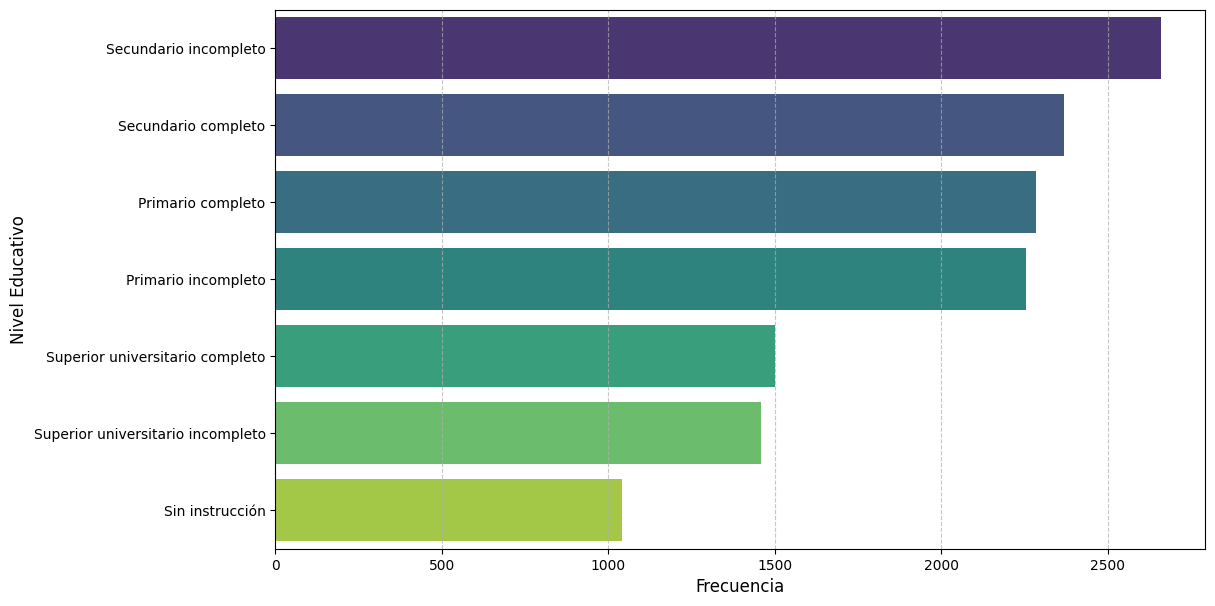

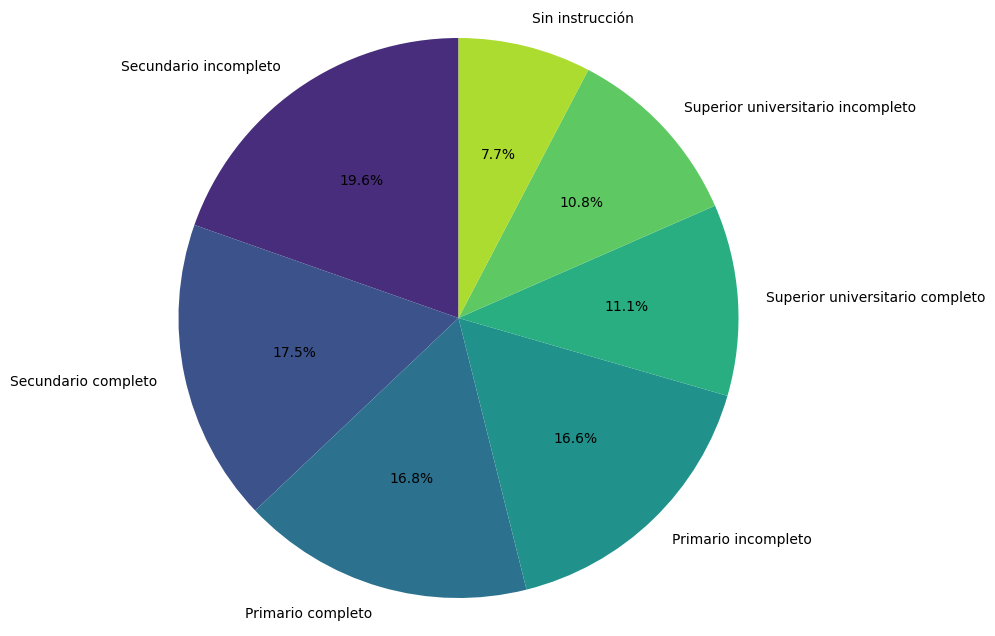

Frecuencia de cada categoría:
NIVEL_ED_LABEL
Secundario incompleto                2661
Secundario completo                  2369
Primario completo                    2285
Primario incompleto                  2254
Superior universitario completo      1500
Superior universitario incompleto    1460
Sin instrucción                      1041
Name: count, dtype: int64

Proporción de cada categoría (en %):
NIVEL_ED_LABEL
Secundario incompleto                19.609433
Secundario completo                  17.457627
Primario completo                    16.838615
Primario incompleto                  16.610169
Superior universitario completo      11.053795
Superior universitario incompleto    10.759027
Sin instrucción                       7.671334
Name: proportion, dtype: float64


In [34]:
##VARIABLE NIVEL EDUCATIVO NIVEL_ED

import matplotlib.pyplot as plt
import seaborn as sns

# Mapear las categorías con sus descripciones
niveles = {
    1: "Primario incompleto",
    2: "Primario completo",
    3: "Secundario incompleto",
    4: "Secundario completo",
    5: "Superior universitario incompleto",
    6: "Superior universitario completo",
    7: "Sin instrucción",
    9: "Ns/Nr"
}

# Crear una columna con las etiquetas descriptivas
df_final['NIVEL_ED_LABEL'] = df_final['NIVEL_ED'].map(niveles)

# Frecuencia y proporción de cada categoría
frecuencias = df_final['NIVEL_ED_LABEL'].value_counts()
proporciones = df_final['NIVEL_ED_LABEL'].value_counts(normalize=True) * 100

# Gráfico de barras para frecuencias
plt.figure(figsize=(12, 7))
sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Nivel Educativo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de torta para proporciones
plt.figure(figsize=(10, 8))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(proporciones)))
plt.axis('equal')  # Asegurar que sea circular
plt.show()

# Impresión de las estadísticas
print("Frecuencia de cada categoría:")
print(frecuencias)
print("\nProporción de cada categoría (en %):")
print(proporciones)



/var/folders/yq/hslcp2kx13xch3kwq7cvmrf00000gn/T/ipykernel_70486/1467081073.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='coolwarm')


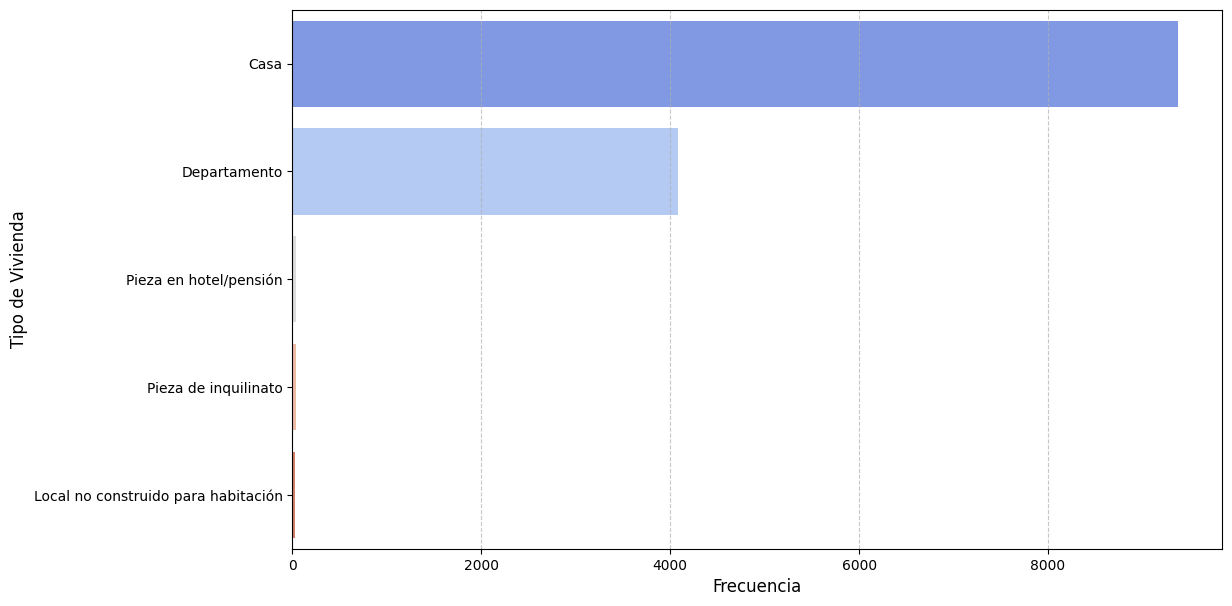

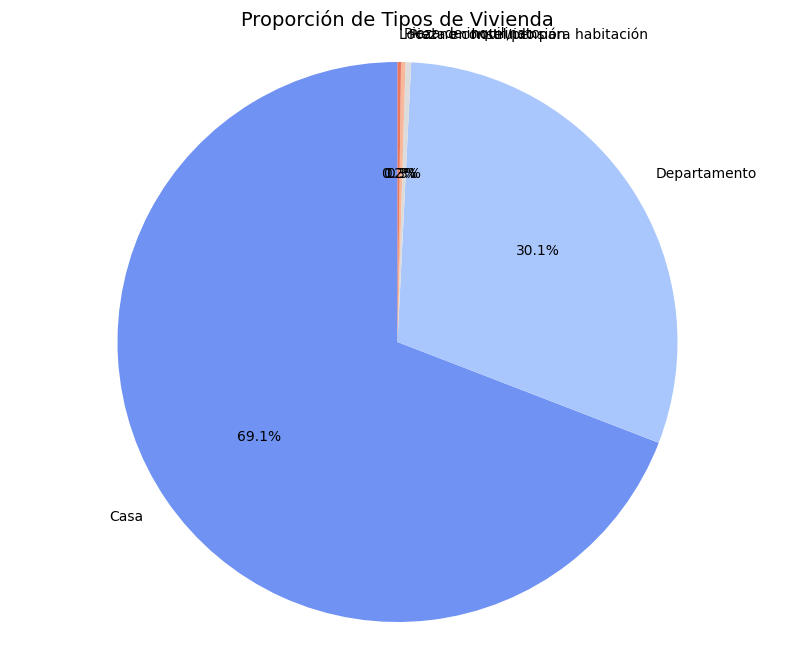

Frecuencia de cada categoría:
IV1_LABEL
Casa                                   9376
Departamento                           4079
Pieza en hotel/pensión                   44
Pieza de inquilinato                     35
Local no construido para habitación      27
Name: count, dtype: int64

Proporción de cada categoría (en %):
IV1_LABEL
Casa                                   69.139444
Departamento                           30.078903
Pieza en hotel/pensión                  0.324460
Pieza de inquilinato                    0.258093
Local no construido para habitación     0.199100
Name: proportion, dtype: float64


In [35]:
#VARIABLE TIPO DE VIVIENDA IV1

# Mapear las categorías con sus descripciones
tipos_vivienda = {
    1: "Casa",
    2: "Departamento",
    3: "Pieza de inquilinato",
    4: "Pieza en hotel/pensión",
    5: "Local no construido para habitación"
}

# Crear una columna con las etiquetas descriptivas
df_final['IV1_LABEL'] = df_final['IV1'].map(tipos_vivienda)

# Frecuencia y proporción de cada categoría
frecuencias = df_final['IV1_LABEL'].value_counts()
proporciones = df_final['IV1_LABEL'].value_counts(normalize=True) * 100

# Gráfico de barras para frecuencias
plt.figure(figsize=(12, 7))
sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='coolwarm')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Tipo de Vivienda', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de torta para proporciones
plt.figure(figsize=(10, 8))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(proporciones)))
plt.title('Proporción de Tipos de Vivienda', fontsize=14)
plt.axis('equal')  # Asegurar que sea circular
plt.show()

# Impresión de las estadísticas
print("Frecuencia de cada categoría:")
print(frecuencias)
print("\nProporción de cada categoría (en %):")
print(proporciones)


### Parte II: Clasificación y regularización

#### Ejercicio 1
En este ejercicio se separa la base en train y test para cada año

In [36]:
df_final.columns.values

array(['AGLOMERADO', 'CODUSU', 'NRO_HOGAR', 'CH04', 'CH06', 'CH07',
       'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF_x', 'P21',
       'ORIGEN', 'ITF', 'IPCF_y', 'DECIFR', 'DECCFR', 'IV1', 'II1', 'II2',
       'V5', 'IX_TOT', 'IV12_3', 'II4_3', 'II9', 'V1', 'mayor_garage',
       'mujer_emergencia', 'mujer_hogar', 'NIVEL_ED_LABEL', 'IV1_LABEL'],
      dtype=object)

In [37]:
from sklearn.model_selection import train_test_split

# Creamos variable 'desocupado' (1 si ESTADO == 2, 0 en caso contrario)

df_final['desocupado'] = (df_final['ESTADO'] == 2).astype(int)

In [38]:
# Seleccionamos variables predictoras:

variables_predictoras = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'CAT_INAC', 
                        'DECIFR', 'DECCFR', 'IV1', 'II1', 'II2', 'V5', 'IX_TOT', 
                        'IV12_3', 'II4_3', 'V1']


In [39]:
# Separamos datos por año
df_final_2004 = df_final[df_final['ORIGEN'] == 'T1_2004']
df_final_2024 = df_final[df_final['ORIGEN'] == 'T1_2024']

In [40]:
# Train-test split para 2004
X_2004 = df_final_2004[variables_predictoras]
X_2004 = pd.concat([pd.Series(1, index=X_2004.index, name='const'), X_2004], axis=1)
y_2004 = df_final_2004['desocupado']

X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(
    X_2004, y_2004,
    test_size=0.3,
    random_state=101
)

In [41]:
# Train-test split para 2024
X_2024 = df_final_2024[variables_predictoras]
X_2024 = pd.concat([pd.Series(1, index=X_2024.index, name='const'), X_2024], axis=1)
y_2024 = df_final_2024['desocupado']

X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(
    X_2024, y_2024,
    test_size=0.3,
    random_state=101
)

In [42]:
print(X_train_2004.head(10))

      const  CH04  CH06  CH07  CH08  NIVEL_ED  CAT_INAC  DECIFR  DECCFR  IV1  \
4066      1   2.0  18.0   5.0   1.0       5.0       3.0     9.0     6.0    1   
5444      1   1.0  31.0   2.0   1.0       4.0       0.0    10.0    10.0    1   
3198      1   2.0  18.0   5.0   2.0       5.0       3.0    10.0    10.0    1   
679       1   2.0  25.0   5.0   2.0       6.0       0.0     9.0     8.0    2   
2266      1   1.0  15.0   5.0   4.0       3.0       3.0     1.0     1.0    1   
5424      1   1.0   3.0   5.0   1.0       7.0       5.0     6.0     6.0    1   
5210      1   1.0  16.0   5.0   1.0       3.0       3.0     5.0     3.0    2   
2768      1   1.0  25.0   1.0   1.0       4.0       0.0     6.0     6.0    1   
6293      1   1.0  42.0   2.0   1.0       2.0       0.0     4.0     4.0    1   
1996      1   1.0   5.0   5.0   4.0       7.0       5.0     5.0     3.0    1   

      II1  II2  V5  IX_TOT  IV12_3  II4_3  V1  
4066  9.0  4.0   2     5.0     2.0    1.0   1  
5444  3.0  2.0   2     

In [43]:
df_final.columns.values

array(['AGLOMERADO', 'CODUSU', 'NRO_HOGAR', 'CH04', 'CH06', 'CH07',
       'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF_x', 'P21',
       'ORIGEN', 'ITF', 'IPCF_y', 'DECIFR', 'DECCFR', 'IV1', 'II1', 'II2',
       'V5', 'IX_TOT', 'IV12_3', 'II4_3', 'II9', 'V1', 'mayor_garage',
       'mujer_emergencia', 'mujer_hogar', 'NIVEL_ED_LABEL', 'IV1_LABEL',
       'desocupado'], dtype=object)

#### Ejercicio 2
¿Cómo elegir por validación cruzada?

Para elegir λ por validación cruzada:

Computamos el MSE para cada partición dejando una parte para validar
Promediamos los MSE de cada partición para obtener CV(𝑓̂,α)
Elegimos el λ que minimice CV(𝑓̂,α) en una grilla de valores

No usamos el conjunto de prueba (test) porque esto implicaría usar el MSE_test en la elección del modelo,
cuando test debe usarse únicamente para evaluar el error de predicción fuera de la muestra (test MSE).

#### Ejercicio 3
Implicancias de usar un k muy pequeño o uno muy grande + Cuando k = n (con n el número de muestras), ¿cuántas veces se estima el modelo? 

K chico  --> cada vez que entrenamos, usamos muchos datos
         --> el resultado puede variar mucho según qué observaciones tocaron en cada grupo

K grande --> a evaluación es más robusta porque probamos en muchos grupos diferentes
         --> cada vez que entrenamos usamos menos datos y el modelo puede no aprender bien

Y cuando k = n: 'leave one out' (LOOV). Se estima el modelo n veces con n-1 datos. 
Es computacionalmente muy costoso porque hay que entrenar tantas veces como observaciones tengamos


#### Ejercicio 4
LASSO, Ridge

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [45]:
#L1 (LASSO) y L2 (Ridge) con lambda=1 (C=1)

lasso = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=1000, random_state=101)
ridge = LogisticRegression(penalty='l2', C=1, max_iter=1000, random_state=101)

In [46]:
resultados = {}


In [47]:
for x, (X_train, X_test, y_train, y_test) in [
    ('2004', (X_train_2004, X_test_2004, y_train_2004, y_test_2004)),
    ('2024', (X_train_2024, X_test_2024, y_train_2024, y_test_2024))
]:
    resultados[x] = {}

##### 2004:


LASSO:
Matriz de Confusión:
[[2092   10]
 [ 129   24]]
AUC: 0.897
Sensibilidad: 0.1568627450980392
Precisión: 0.7058823529411765


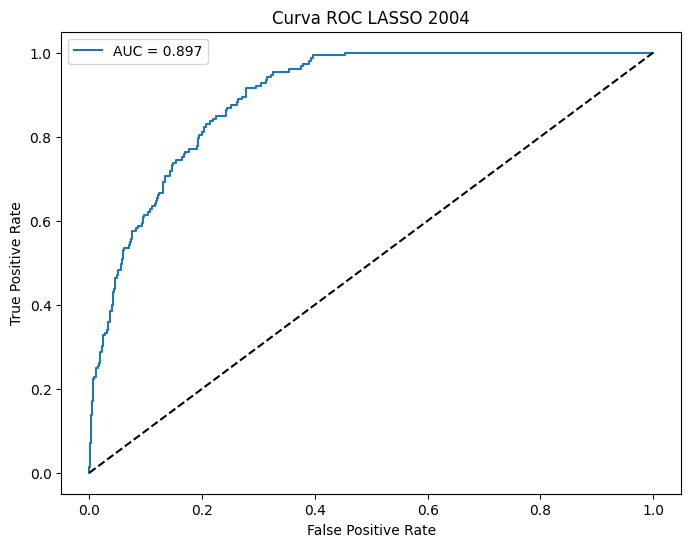

In [48]:
# LASSO
lasso = LogisticRegression(penalty='l1', C=1, solver='liblinear', random_state=101)
lasso.fit(X_train_2004, y_train_2004)
y_pred_lasso = lasso.predict(X_test_2004)
y_pred_proba_lasso = lasso.predict_proba(X_test_2004)[:,1]

# Métricas LASSO
conf_matrix_lasso = confusion_matrix(y_test_2004, y_pred_lasso)
fpr_lasso, tpr_lasso, _ = roc_curve(y_test_2004, y_pred_proba_lasso)
auc_score_lasso = auc(fpr_lasso, tpr_lasso)

print("\nLASSO:")
print("Matriz de Confusión:")
print(conf_matrix_lasso)
print(f"AUC: {auc_score_lasso:.3f}")
print("Sensibilidad:", recall_score(y_test_2004, y_pred_lasso))
print("Precisión:", precision_score(y_test_2004, y_pred_lasso))

# ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_lasso, tpr_lasso, label=f'AUC = {auc_score_lasso:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC LASSO 2004')
plt.legend()
plt.show()


Ridge:
Matriz de Confusión:
[[2092   10]
 [ 131   22]]
AUC: 0.895
Accuracy: 0.937
Sensibilidad: 0.1437908496732026
Precisión: 0.6875


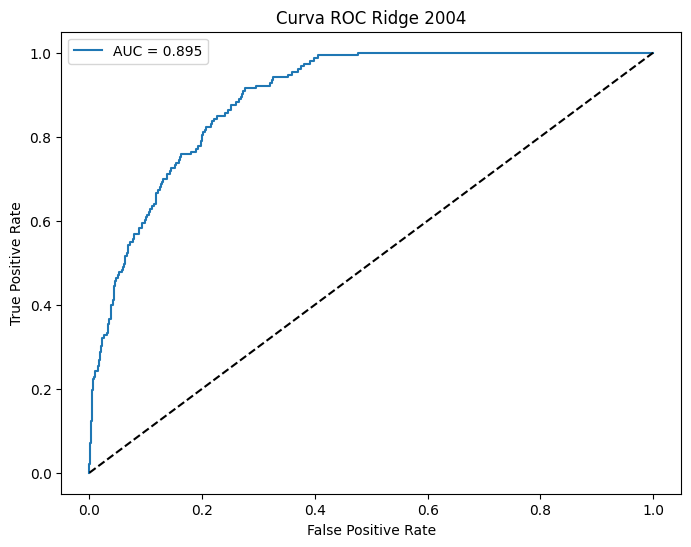

In [49]:
# Ridge
ridge = LogisticRegression(penalty='l2', C=1, max_iter=1000, random_state=101)
ridge.fit(X_train_2004, y_train_2004)
y_pred_ridge = ridge.predict(X_test_2004)
y_pred_proba_ridge = ridge.predict_proba(X_test_2004)[:,1]

# Métricas Ridge
conf_matrix_ridge = confusion_matrix(y_test_2004, y_pred_ridge)
fpr_ridge, tpr_ridge, _ = roc_curve(y_test_2004, y_pred_proba_ridge)
auc_score_ridge = auc(fpr_ridge, tpr_ridge)
accuracy_ridge = accuracy_score(y_test_2004, y_pred_ridge)

print("\nRidge:")
print("Matriz de Confusión:")
print(conf_matrix_ridge)
print(f"AUC: {auc_score_ridge:.3f}")
print(f"Accuracy: {accuracy_ridge:.3f}")
print("Sensibilidad:", recall_score(y_test_2004, y_pred_ridge))
print("Precisión:", precision_score(y_test_2004, y_pred_ridge))

# ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_ridge, tpr_ridge, label=f'AUC = {auc_score_ridge:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Ridge 2004')
plt.legend()
plt.show()

En 2004, tanto con LASSO como con RIDGE, mejoramos en precisión pero empeoramos mucho en recall. Es decir, de los individuos que predije desempleados
bastantes lo eran pero logramos identificar pocos positivos reales.

##### 2024:


LASSO:
Matriz de Confusión:
[[1722    3]
 [  90    2]]
AUC: 0.890
Sensibilidad: 0.021739130434782608
Precisión: 0.4


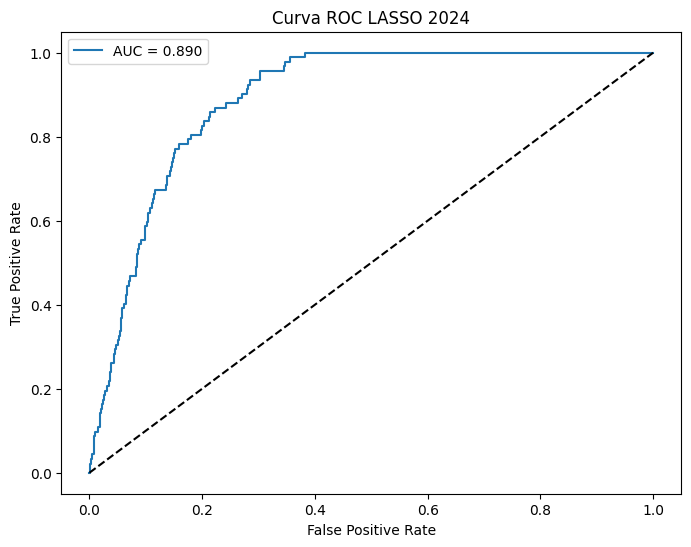

In [50]:
# LASSO
lasso = LogisticRegression(penalty='l1', C=1, solver='liblinear', random_state=101)
lasso.fit(X_train_2024, y_train_2024)
y_pred_lasso_2024 = lasso.predict(X_test_2024)
y_pred_proba_lasso_2024 = lasso.predict_proba(X_test_2024)[:,1]

# Métricas LASSO
conf_matrix_lasso = confusion_matrix(y_test_2024, y_pred_lasso_2024)
fpr_lasso, tpr_lasso, _ = roc_curve(y_test_2024, y_pred_proba_lasso_2024)
auc_score_lasso = auc(fpr_lasso, tpr_lasso)

print("\nLASSO:")
print("Matriz de Confusión:")
print(conf_matrix_lasso)
print(f"AUC: {auc_score_lasso:.3f}")
print("Sensibilidad:", recall_score(y_test_2024, y_pred_lasso_2024))
print("Precisión:", precision_score(y_test_2024, y_pred_lasso_2024))

# ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_lasso, tpr_lasso, label=f'AUC = {auc_score_lasso:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC LASSO 2024')
plt.legend()
plt.show()


Ridge:
Matriz de Confusión:
[[1721    4]
 [  90    2]]
AUC: 0.890
Accuracy: 0.948
Sensibilidad: 0.021739130434782608
Precisión: 0.3333333333333333


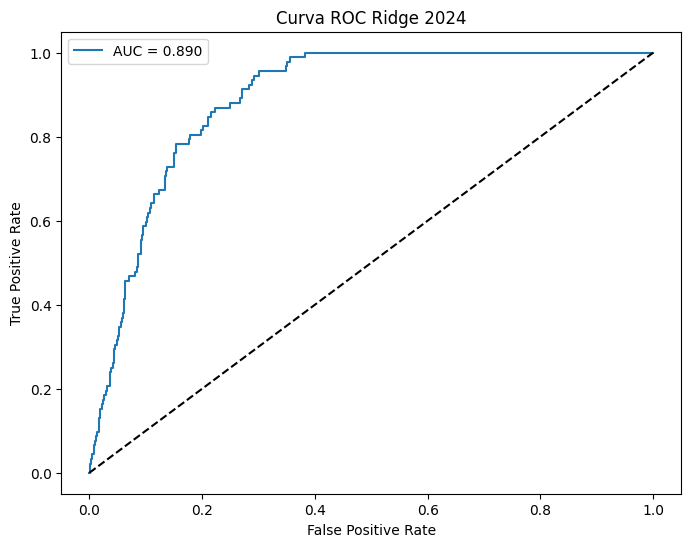

In [51]:
# Ridge en 2024
ridge = LogisticRegression(penalty='l2', C=1, max_iter=1000, random_state=101)
ridge.fit(X_train_2024, y_train_2024)
y_pred_ridge_2024 = ridge.predict(X_test_2024)
y_pred_proba_ridge_2024 = ridge.predict_proba(X_test_2024)[:,1]

# Métricas Ridge
conf_matrix_ridge = confusion_matrix(y_test_2024, y_pred_ridge_2024)
fpr_ridge, tpr_ridge, _ = roc_curve(y_test_2024, y_pred_proba_ridge_2024)
auc_score_ridge = auc(fpr_ridge, tpr_ridge)
accuracy_ridge = accuracy_score(y_test_2024, y_pred_ridge_2024)

print("\nRidge:")
print("Matriz de Confusión:")
print(conf_matrix_ridge)
print(f"AUC: {auc_score_ridge:.3f}")
print(f"Accuracy: {accuracy_ridge:.3f}")
print("Sensibilidad:", recall_score(y_test_2024, y_pred_ridge_2024))
print("Precisión:", precision_score(y_test_2024, y_pred_ridge_2024))

# Gráfica ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_ridge, tpr_ridge, label=f'AUC = {auc_score_ridge:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Ridge 2024')
plt.legend()
plt.show()

Significativamente peor que el TP3 en identificar casos positivos.
Muchos más falsos negativos.


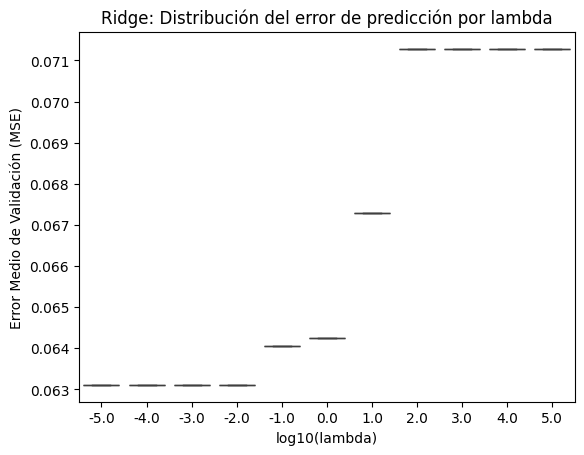

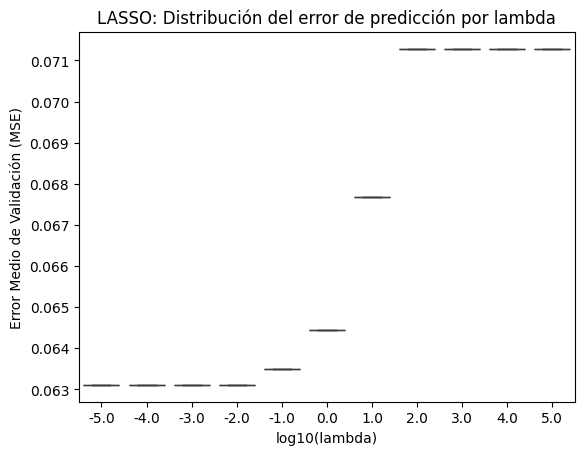

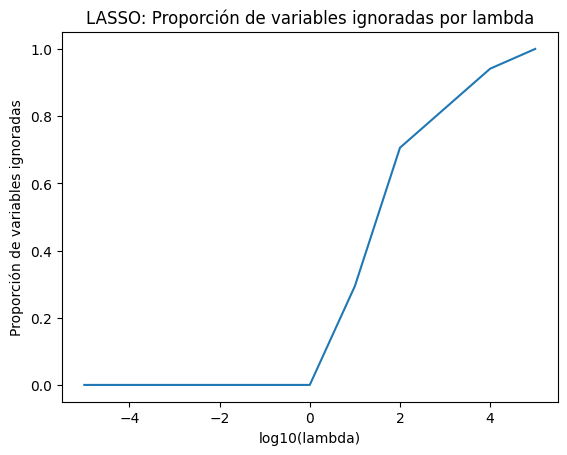

In [52]:
#Ejercicio 5
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Rango de valores de lambda
lambdas = [10**n for n in range(-5, 6)]  # n entre -5 y 5

# Almacenar resultados
results_ridge = {'lambda': [], 'mse': []}
results_lasso = {'lambda': [], 'mse': [], 'ignored_features': []}

for lmb in lambdas:
    # Ridge
    ridge = LogisticRegression(penalty='l2', C=1/lmb, max_iter=1000, solver='liblinear', random_state=101)
    mse_ridge = -np.mean(cross_val_score(ridge, X_train_2004, y_train_2004, cv=10, scoring='neg_mean_squared_error'))
    results_ridge['lambda'].append(lmb)
    results_ridge['mse'].append(mse_ridge)
    
    # LASSO
    lasso = LogisticRegression(penalty='l1', C=1/lmb, max_iter=1000, solver='liblinear', random_state=101)
    mse_lasso = -np.mean(cross_val_score(lasso, X_train_2004, y_train_2004, cv=10, scoring='neg_mean_squared_error'))
    results_lasso['lambda'].append(lmb)
    results_lasso['mse'].append(mse_lasso)
    
    # Proporción de variables ignoradas (coeficientes cero)
    lasso.fit(X_train_2004, y_train_2004)
    ignored_features = np.sum(lasso.coef_ == 0) / len(lasso.coef_[0])
    results_lasso['ignored_features'].append(ignored_features)

# Convertir a DataFrame
import pandas as pd
df_ridge = pd.DataFrame(results_ridge)
df_lasso = pd.DataFrame(results_lasso)

# Generar gráficos
import matplotlib.pyplot as plt

# Boxplot para Ridge y LASSO
sns.boxplot(x=np.log10(df_ridge['lambda']), y=df_ridge['mse'])
plt.title('Ridge: Distribución del error de predicción por lambda')
plt.xlabel('log10(lambda)')
plt.ylabel('Error Medio de Validación (MSE)')
plt.show()

sns.boxplot(x=np.log10(df_lasso['lambda']), y=df_lasso['mse'])
plt.title('LASSO: Distribución del error de predicción por lambda')
plt.xlabel('log10(lambda)')
plt.ylabel('Error Medio de Validación (MSE)')
plt.show()

# Line plot para proporción de variables ignoradas en LASSO
plt.plot(np.log10(df_lasso['lambda']), df_lasso['ignored_features'])
plt.title('LASSO: Proporción de variables ignoradas por lambda')
plt.xlabel('log10(lambda)')
plt.ylabel('Proporción de variables ignoradas')
plt.show()

#Los graficos muestran que el error medio de validación (MSE) es mínimo para valores de log10(λ) ≈ -5 tanto en Ridge como en LASSO. 
#Esto significa que con una penalización muy baja (regularización débil), el modelo tiene mejor capacidad de ajuste.
#LASSO y Variables: A medida que λ aumenta, LASSO elimina variables importantes, lo que reduce la sensibilidad del modelo.
#Respecto a TP3, los modelos regularizados (LASSO y Ridge) tienen peor desempeño y más falsos negativos que el modelo sin regularización concluyendo que 
#la regularización no mejora el modelo; penalizaciones débiles funcionan mejor.


In [53]:
#Ejercicio 6:
# Seleccionar lambda óptimo para LASSO
lambda_opt_lasso = df_lasso.loc[df_lasso['mse'].idxmin(), 'lambda']

# Modelo con lambda óptimo
lasso_opt = LogisticRegression(penalty='l1', C=1/lambda_opt_lasso, max_iter=1000, solver='liblinear', random_state=101)
lasso_opt.fit(X_train_2004, y_train_2004)

# Variables descartadas
variables_descartadas = X_train_2004.columns[lasso_opt.coef_[0] == 0]
print(f"Variables descartadas por LASSO con lambda óptimo: {list(variables_descartadas)}")

# El resultado indica que ninguna variable fue eliminada al aplicar LASSO con el λ óptimo encontrado. Esto se debe a la regularización débil aplicada.
# Esto coincide con los resultados previos, donde valores bajos de λ minimizan el error, pero no simplifican el modelo.
# Al aumentar λ, LASSO empieza a eliminar variables, como se vio en el gráfico de "proporción de variables ignoradas".

#Relacion con inciso 1 parte 1: En el inciso 1, se identificaron variables que reflejan la situación económica y social del hogar (ingreso total, ingreso per cápita, tipo de vivienda y tamaño del hogar).
#El hecho de que ninguna variable haya sido descartada por LASSO confirma que estas variables son informativas y relevantes para el modelo, como se había anticipado en el análisis inicial.

Variables descartadas por LASSO con lambda óptimo: []


In [54]:
#Ejercicio 7
# Evaluación del modelo óptimo en 2024
lasso_opt_2024 = LogisticRegression(penalty='l1', C=1/lambda_opt_lasso, max_iter=1000, solver='liblinear', random_state=101)
lasso_opt_2024.fit(X_train_2024, y_train_2024)

# Variables descartadas en 2024
variables_descartadas_2024 = X_train_2024.columns[lasso_opt_2024.coef_[0] == 0]

# Comparación de MSE y regularización
ridge_mse_2004 = df_ridge.loc[df_ridge['mse'].idxmin(), 'mse']
ridge_mse_2024 = -np.mean(cross_val_score(ridge, X_train_2024, y_train_2024, cv=10, scoring='neg_mean_squared_error'))

lasso_mse_2024 = df_lasso.loc[df_lasso['mse'].idxmin(), 'mse']

print(f"MSE Ridge 2004: {ridge_mse_2004:.3f}")
print(f"MSE Ridge 2024: {ridge_mse_2024:.3f}")
print(f"MSE LASSO 2004: {lasso_mse_2024:.3f}")

print("\nComparación de variables descartadas:")
print(f"2004: {list(variables_descartadas)}")
print(f"2024: {list(variables_descartadas_2024)}")


#Modelo elegido:
#Se eligió el modelo de regresión logística LASSO (penalización L1) con el λ óptimo log10(λ)≈ -5 encontrado mediante validación cruzada.
#Comparación 2004 vs. 2024:
#El desempeño fue similar en ambos años, con un MSE de 0.063 en 2004 y ninguna variable descartada.
#Ridge mostró un menor MSE en 2024 (0.052), lo que indica un mejor ajuste a los datos recientes.
#Regularización más efectiva:
#Aunque Ridge tuvo un menor MSE en 2024, LASSO es más interpretable por su capacidad de simplificar el modelo al descartar variables (aunque no ocurrió con este λ).
#En este caso, ninguna regularización mejoró significativamente el rendimiento general.

MSE Ridge 2004: 0.063
MSE Ridge 2024: 0.052
MSE LASSO 2004: 0.063

Comparación de variables descartadas:
2004: []
2024: []
